First few rows of the dataset:
   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0  2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00    1
1  3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00    1
2  4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00    1
3  5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00    1
4  6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26    1

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float6

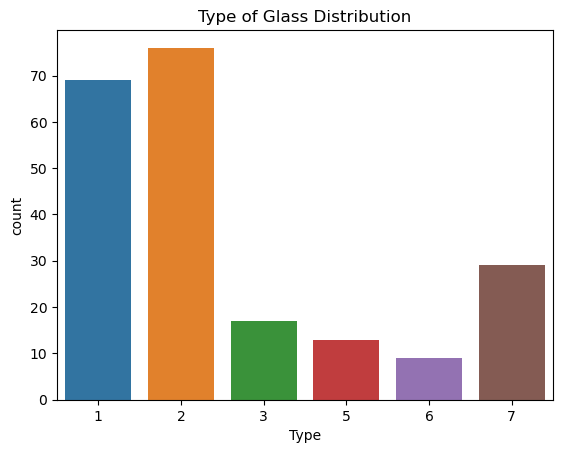

D:\workdata\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


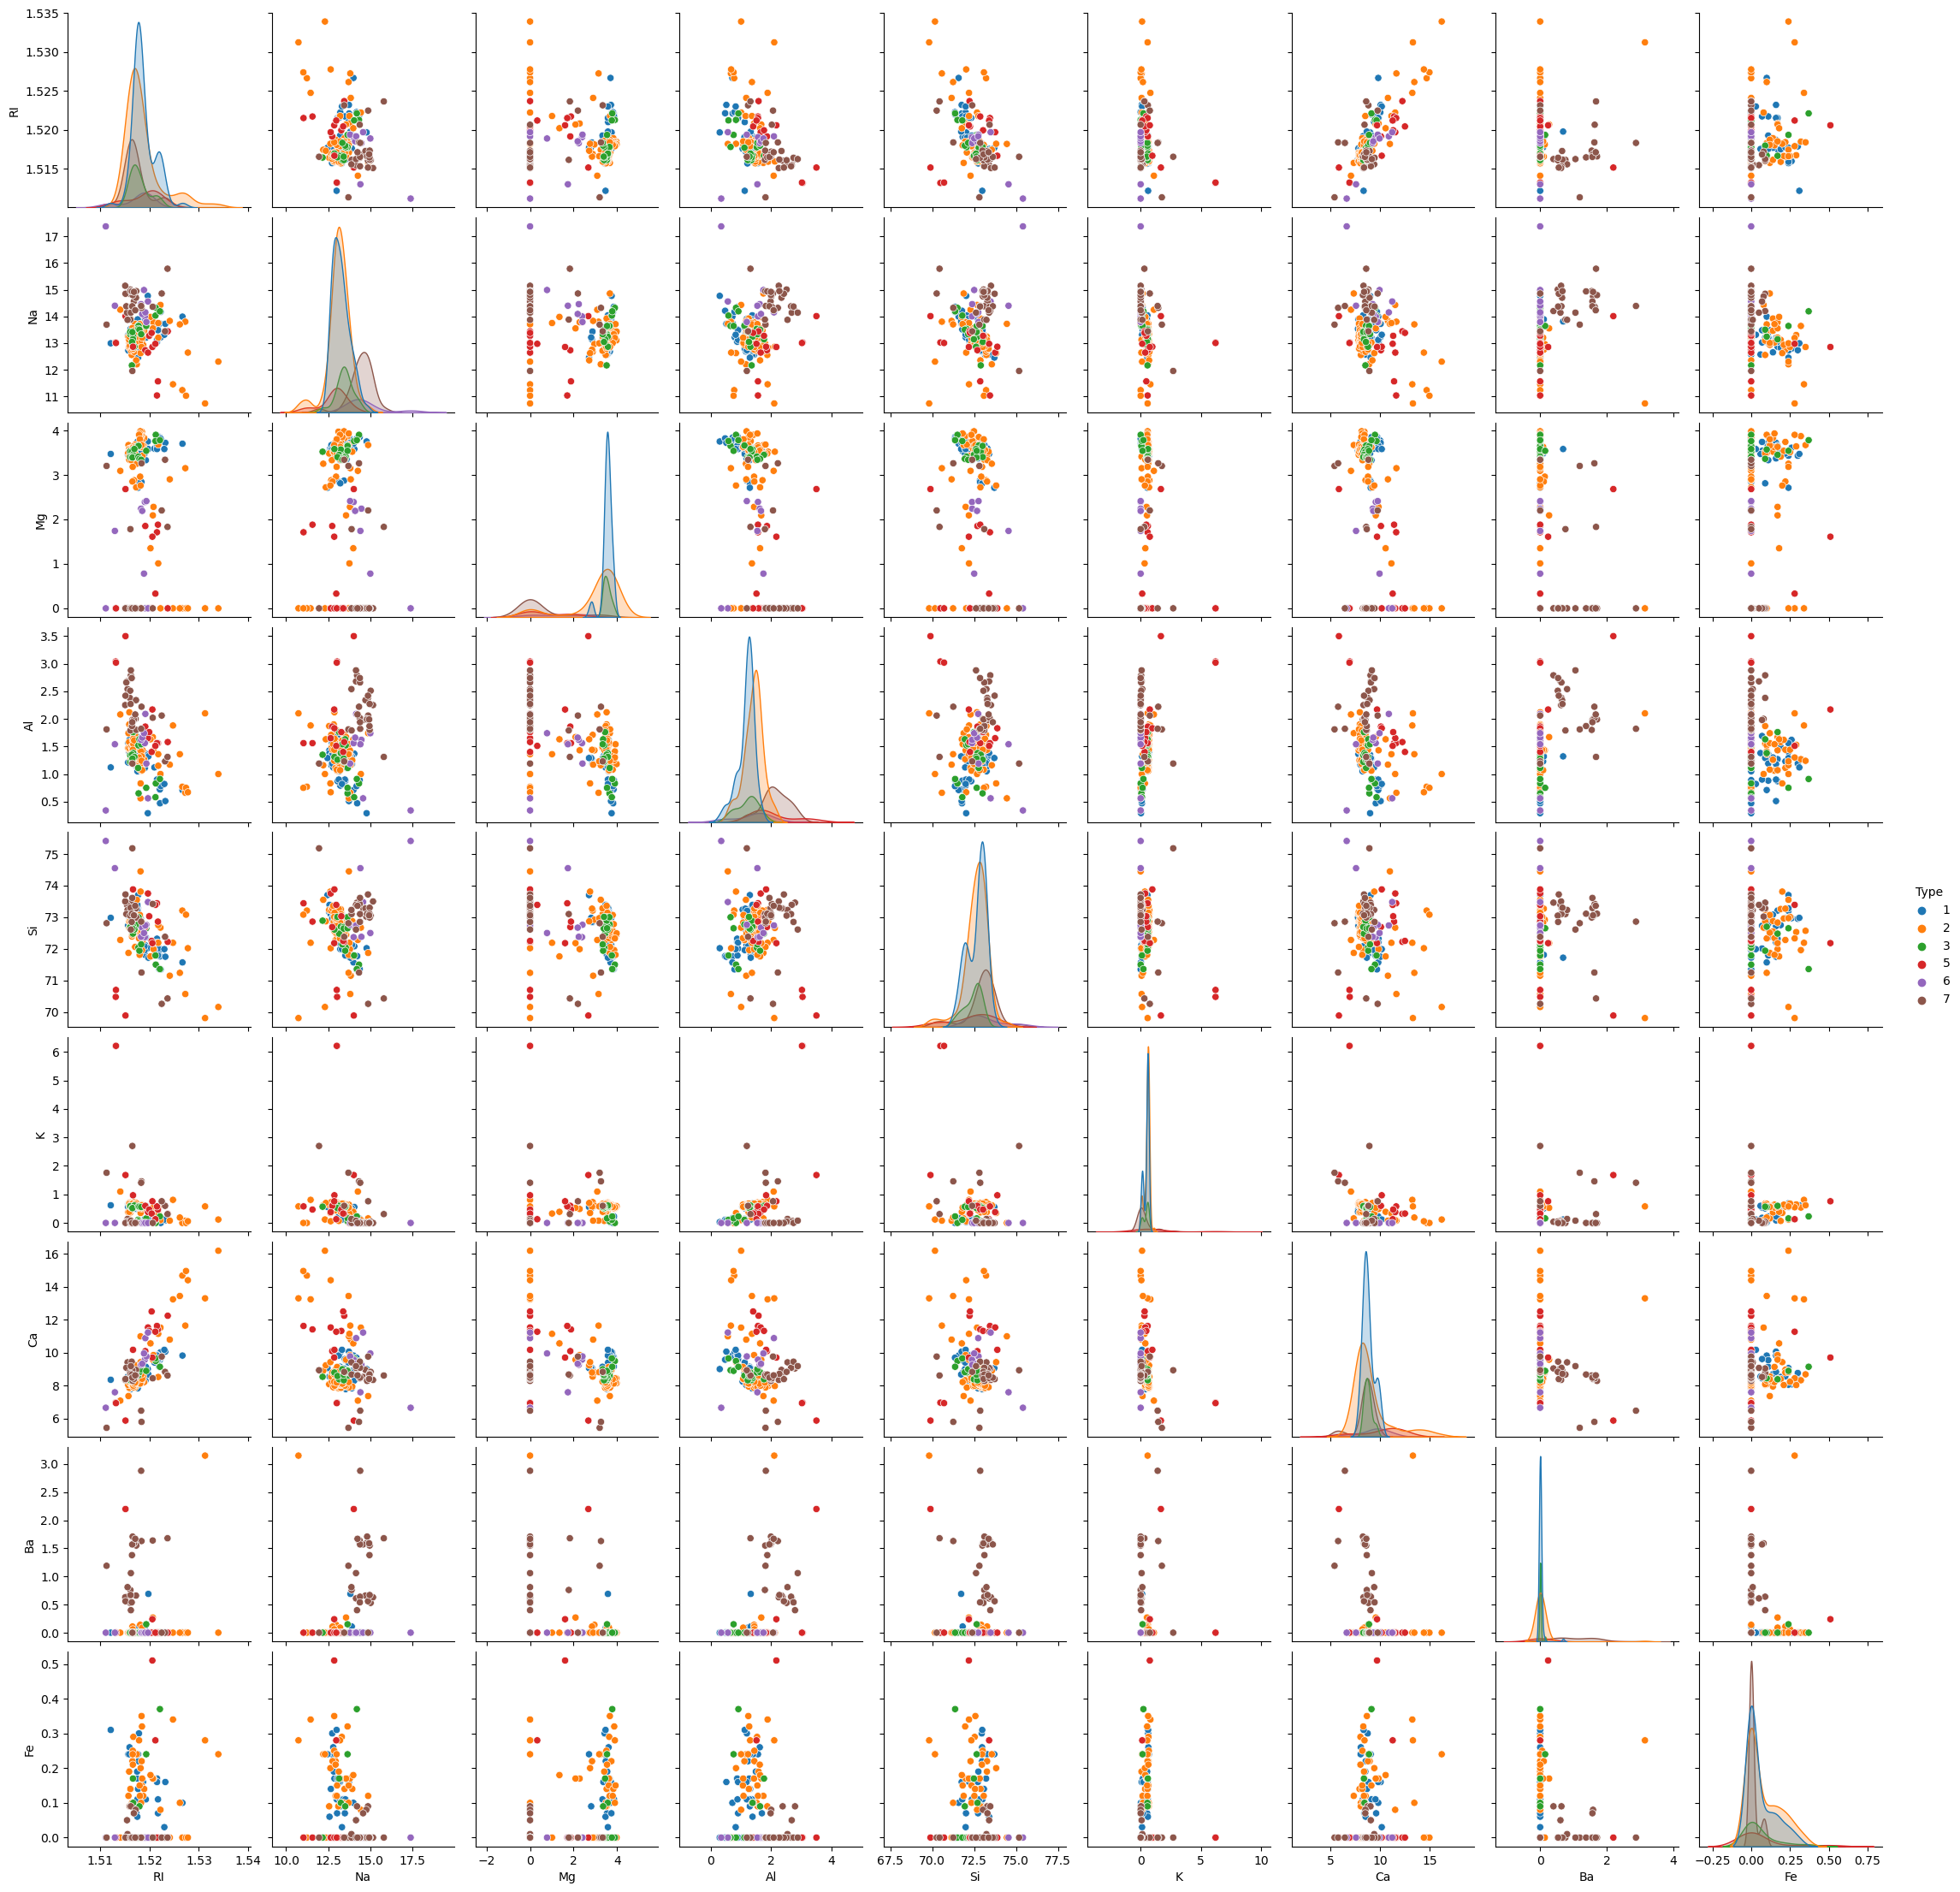

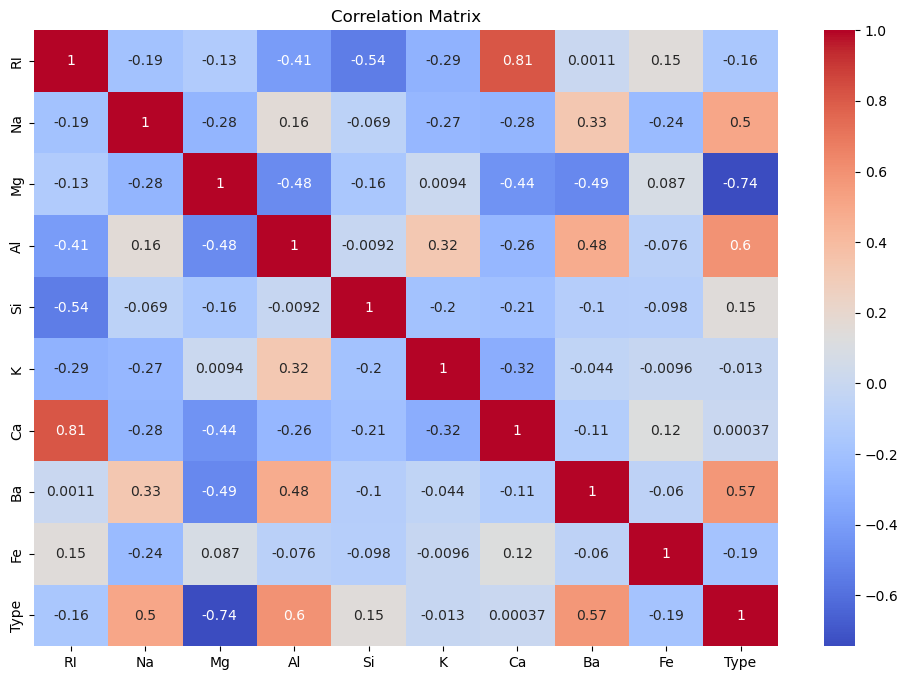


Logistic Regression Model Evaluation:
[[ 5  4  1  0  0  0]
 [ 1 12  1  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  1  0  7]]
              precision    recall  f1-score   support

           1       0.71      0.50      0.59        10
           2       0.63      0.80      0.71        15
           3       0.00      0.00      0.00         3
           5       0.60      1.00      0.75         3
           6       1.00      1.00      1.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.70        43
   macro avg       0.66      0.68      0.65        43
weighted avg       0.71      0.70      0.69        43

Accuracy: 0.6976744186046512

Best Parameters and Score for Decision Tree Classifier:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7058823529411765

Model Comparison Results:

Random Forest Results:
[[ 7  3  0  0  0  0]
 [ 2 12  0  1  0  

D:\workdata\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\workdata\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\workdata\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.59      0.87      0.70        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.70        43
   macro avg       0.70      0.56      0.59        43
weighted avg       0.70      0.70      0.67        43

Accuracy: 0.6976744186046512

Decision Tree Results:
[[7 0 2 0 0 1]
 [3 9 1 1 1 0]
 [0 1 2 0 0 0]
 [0 0 0 3 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 1 7]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.69      0.60      0.64        15
           3       0.33      0.67      0.44         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.0

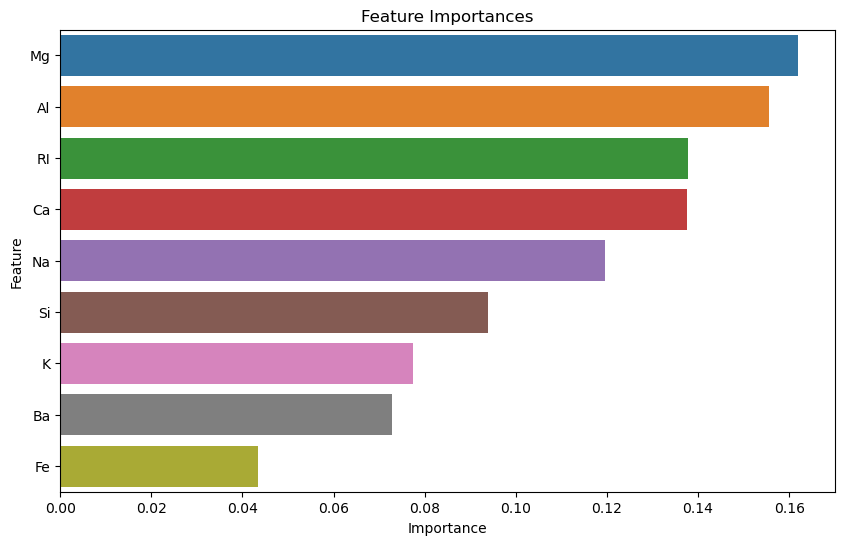

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv'
glass_data = pd.read_csv(url)

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(glass_data.head())

# Display dataset information
print("\nDataset Information:")
print(glass_data.info())

# Display column names
print("\nColumn Names:")
print(glass_data.columns)

# Display basic statistics
print("\nBasic Statistics:")
print(glass_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(glass_data.isnull().sum())

# Data preprocessing
# Check if 'Id number' column exists and drop it if present
if '1' in glass_data.columns:
    glass_data.drop('1', axis=1, inplace=True)

# Rename columns to more meaningful names based on the provided dataset information
glass_data.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Convert 'Type' to a categorical type
glass_data['Type'] = glass_data['Type'].astype('category')

# Display dataset information after preprocessing
print("\nDataset Information after preprocessing:")
print(glass_data.info())

# Exploratory Data Analysis (EDA)
# Visualize the distribution of the target variable (Type of glass)
sns.countplot(data=glass_data, x='Type')
plt.title('Type of Glass Distribution')
plt.show()

# Pairplot to visualize relationships between features and the target
sns.pairplot(glass_data, hue='Type')
plt.show()

# Calculate the correlation matrix
correlation_matrix = glass_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the data into features and target variable
X = glass_data.drop('Type', axis=1)
y = glass_data['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Model Evaluation:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')

# Hyperparameter tuning for Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("\nBest Parameters and Score for Decision Tree Classifier:")
print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Model comparison
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC()
dt_classifier_best = DecisionTreeClassifier(**best_params, random_state=42)

classifiers = {
    'Random Forest': rf_classifier,
    'SVM': svm_classifier,
    'Decision Tree': dt_classifier_best
}

print("\nModel Comparison Results:")
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'\n{name} Results:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {acc}')

# Final Model and Interpretation
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)
y_pred_final = final_model.predict(X_test)
acc_final = accuracy_score(y_test, y_pred_final)

print("\nFinal Model (Random Forest Classifier) Evaluation:")
print(confusion_matrix(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))
print(f'Accuracy: {acc_final}')

# Feature importance analysis
feature_importances = final_model.feature_importances_
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Feature Importances')
plt.show()
